In [415]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [416]:

import random
import matplotlib.pyplot as plt
import numpy as np

class Matrix:
    def __init__(self, rows):
        self.data = rows 
        self.flops = 0
        self.swaps = 0
        self.compare = 0
        self.rows = len(rows)
        self.cols = len(rows[0])
    def __getitem__(self, index):
        return self.data[index]
    
    def __setitem__(self, index, value):
        self.data[index] = value
    
    
    def __repr__(self) -> str:
        output = ''
        for row in self.data:
            output+="|"
            for elem in row:
                output+=' '+"%.4f" %elem+' '
            output+='|\n'
        return output
    
    def __eq__(self,other):
        for row1,row2 in zip(self,other):
            for elem1,elem2 in zip(row1,row2):
                if not elem1 == elem2:
                    return False 
        return True
    
    def eqWithTol(self,mat, rel_tol=0.05, abs_tol=1e-9):
        other = mat.data
        for row1,row2 in zip(self,other):
            for elem1,elem2 in zip(row1,row2):
                if not abs(elem1 - elem2) <= max(rel_tol * max(abs(elem1), abs(elem2)), abs_tol):
                    return False 
        return True
    
    def rand(a=3,b=4,bounds = (0,100)):
        rows = []
        lbound,ubound = bounds
        for i in range(a):
            row = []
            for j in range(b):
                row.append(random.uniform(lbound,ubound))
            rows.append(row)
        return(Matrix(rows))
    
    def swapCols(self,index1,index2):
        for row in self.data:
            temp = row[index1]
            row[index1] = row[index2]
            row[index2] = temp
        self.swaps += self.rows
        
    def swapRows(self,idx1,idx2):
        temp = self.data[idx1]
        self.data[idx1] = self.data[idx2]
        self.data[idx2] = temp
        self.swaps += len(self.data[idx1])
    
    def mulRow(self,idx,k):
        self.data[idx] = [elem * k for elem in self.data[idx]]
        self.flops += len(self.data[idx])
    
    def mulSubRow(self,idx1,idx2,k):
        self.data[idx1] = [elem1-elem2 * k for elem1,elem2 in zip(self.data[idx1],self.data[idx2])]
        self.flops += 2*len(self.data[idx1])
    
    def divRow(self,idx,k):
        self.mulRow(idx,1/k)
    
    def findReversePivot(self,row):
        nCols = self.cols
        for col in range(nCols):
            if self.data[row][col] > 0.5:
                return col
        return None
    
    def reverse(self): 
        nRows = self.rows
        pivotRow = nRows-1
        for _ in range(nRows):
            pivot_col = self.findReversePivot(pivotRow)
            if pivot_col is not None:
                self.eliminateAbove(pivotRow,pivot_col)
            pivotRow-=1
    
    def findNonzeroRow(self,pivotRow, col):
        nRows = self.rows
        for row in range(pivotRow, nRows):
            if self.data[row][col] != 0:
                return row
        return None
    
    def findPivotRow(self, startRow, col):
        nRows = self.rows
        maxRow = None
        maxValue = 0
        for row in range(startRow, nRows):
            if abs(self.data[row][col]) > maxValue+0.00000000001:
                maxValue = abs(self.data[row][col])
                maxRow = row
        return maxRow
    
    def findPivotCol(self, startCol, row):
        nCols = self.cols
        maxCol = None
        maxValue = 0
        for col in range(startCol, nCols-1):
            if abs(self.data[row][col]) > maxValue+0.00000000001:
                maxValue = abs(self.data[row][col])
                maxCol = col
        return maxCol
    
    def findPivotMat(self, startRow, startCol):
        nRows = self.rows
        nCols = self.cols
        maxValue = 0
        pivotPosition = None
        for row in range(startRow, nRows):
            for col in range(startCol, nCols - 1): 
                if abs(self.data[row][col]) > maxValue:
                    maxValue = abs(self.data[row][col])
                    pivotPosition = (row, col)
        return pivotPosition
        
    def eliminateBelow(self, pivotRow, col):
        nRows = self.rows
        for row in range(pivotRow + 1, nRows):
            factor = self.data[row][col]
            self.mulSubRow(row,pivotRow,factor)
    
    def eliminateAbove(self, pivotRow, col):
        for row in range(pivotRow - 1, -1, -1): 
            factor = self.data[row][col]
            self.mulSubRow(row, pivotRow, factor)
    # Սովորական Գաուսի ալգորիթմ որը ընտրում է առաջին ոչ զրոյական էլեմենտը սյունից եթե այն կա
    def gauss(self):
        nCols = self.cols
        pivotRow = 0
        for col in range(nCols):
            nonzero_row = self.findNonzeroRow(pivotRow, col)
            if nonzero_row is not None:
                self.swapRows(pivotRow, nonzero_row)
                self.divRow(pivotRow, self.data[pivotRow][col])
                self.eliminateBelow(pivotRow, col)
                pivotRow += 1
    # Գաուսի ալգորիթմ որը ընտրում է մոդուլով ամենամեծ էլեմենտ սյունից եթե այն կա
    def PPgauss(self):
        nCols = self.cols
        pivotRow = 0
        for col in range(nCols):
            nonzero_row = self.findPivotRow(pivotRow,col)
            if nonzero_row is not None:
                self.swapRows(pivotRow, nonzero_row)
                self.divRow(pivotRow, self.data[pivotRow][col])
                self.eliminateBelow(pivotRow, col)
                pivotRow += 1
    # Գաուսի ալգորիթմ որը ընտրում է մոդուլով ամենամեծ էլեմենտ տողից եթե այն կա
    def ColPGauss(self):
        nRows = self.rows
        pivot_col = 0
        for row in range(nRows):
            nonzero_col = self.findPivotCol(pivot_col, row)
            if nonzero_col is not None:
                if nonzero_col != pivot_col:
                    self.swapCols(pivot_col, nonzero_col)
    
                pivot_value = self.data[row][pivot_col]
                if pivot_value != 0:  
                    self.divRow(row, pivot_value)
    
                self.eliminateBelow(row, pivot_col)
    
                pivot_col += 1
    # Գաուսի ալգորիթմ որը ընտրում է մոդուլով ամենամեծ էլեմենտ մատրիցից եթե այն կա
    def matPgauss(self):
        nRows = self.rows
        nCols = self.cols
        startRow = 0
        startCol = 0
    
        while startRow < nRows and startCol < nCols:
            pivotPosition = self.findPivotMat(startRow, startCol)
            if pivotPosition is None:
                break
    
            pivotRow, pivot_col = pivotPosition
    
            if pivotRow != startRow:
                self.swapRows(startRow, pivotRow)
    
            if pivot_col != startCol:
                self.swapCols(startCol, pivot_col)
    
            pivot_value = self.data[startRow][startCol]
            if pivot_value != 0:  
                self.divRow(startRow, pivot_value)
    
            self.eliminateBelow(startRow, startCol)
    
            startRow += 1
            startCol += 1
    
    def plot(self, save=False, annotate=False):
        matrix_np = np.array(self.data)        
        plt.figure(figsize=(8, 6)) 
        
        cmap = plt.cm.get_cmap('gist_ncar')
        norm = plt.Normalize(vmin=matrix_np.min(), vmax=matrix_np.max())
        
        plt.imshow(matrix_np, cmap=cmap, norm=norm, interpolation='nearest')
        
        plt.colorbar(label='Գունային գռադիենտ') 
        plt.title('Մատրիցի պատկեր')
        plt.xlabel('Սյուներ')
        plt.ylabel('Տողեր')
        
        if annotate:
            for (i, j), val in np.ndenumerate(matrix_np):
                plt.text(j, i, f'{val:.2f}', ha='center', va='center', 
                        color='white' if val < (matrix_np.max() + matrix_np.min()) / 2 else 'black')
                
        if save:
            plt.savefig(f'{save}.svg', format='svg')
            
        plt.show()

    def complexity(self):
        print(f"flops:{self.flops}, comparisons:{self.compare}, swaps:{self.swaps}")


| 0.0000  4.0000  8.0000  7.0000  9.0000 |
| 0.0000  4.0000  8.0000  7.0000  9.0000 |
| 13.0000  3000.0000  7.0000  9.0000  24.0000 |
| 13.0000  30654.0000  7.0000  95.0000  124.0000 |



C:\Users\user\AppData\Local\Temp\ipykernel_12912\67454745.py:215: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gist_ncar')


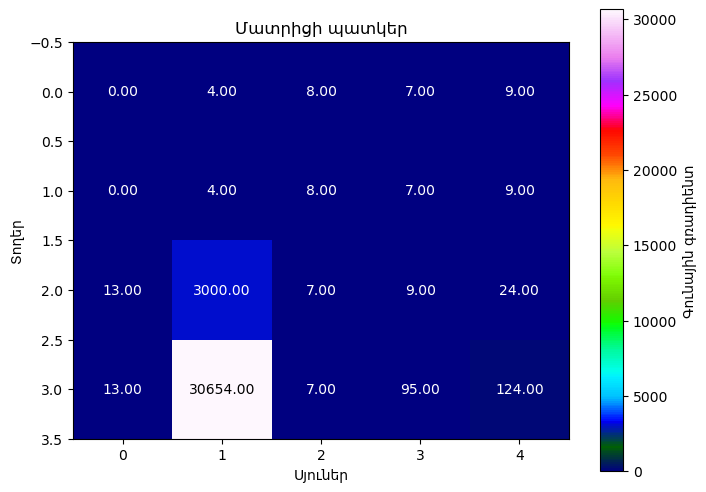

flops:0, comparisons:0, swaps:0
| 1.0000  230.7692  0.5385  0.6923  1.8462 |
| 0.0000  1.0000  2.0000  1.7500  2.2500 |
| -0.0000  -0.0000  1.0000  0.8734  1.1232 |
| 0.0000  0.0000  0.0000  0.0000  0.0000 |

flops:75, comparisons:0, swaps:15
| 1.0000  230.7692  0.5385  0.6923  1.8462 |
| 0.0000  1.0000  2.0000  1.7500  2.2500 |
| -0.0000  -0.0000  1.0000  0.8734  1.1232 |
| 0.0000  0.0000  0.0000  0.0000  0.0000 |

flops:75, comparisons:0, swaps:15
------------------------------------
| 0.0000  4.0000  8.0000  7.0000  9.0000 |
| 0.0000  4.0000  8.0000  7.0000  9.0000 |
| 13.0000  3000.0000  7.0000  9.0000  24.0000 |
| 13.0000  30654.0000  7.0000  95.0000  124.0000 |

flops:0, comparisons:0, swaps:0
| 1.0000  230.7692  0.5385  0.6923  1.8462 |
| 0.0000  1.0000  -0.0000  0.0031  0.0036 |
| 0.0000  0.0000  1.0000  0.8734  1.1232 |
| 0.0000  0.0000  0.0000  0.0000  0.0000 |

flops:75, comparisons:0, swaps:15
| 1.0000  230.7692  0.5385  0.6923  1.8462 |
| 0.0000  1.0000  -0.0000  0.0031  0

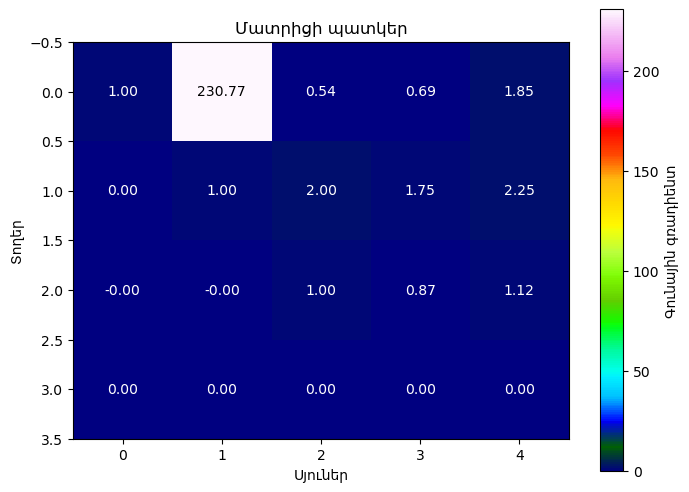

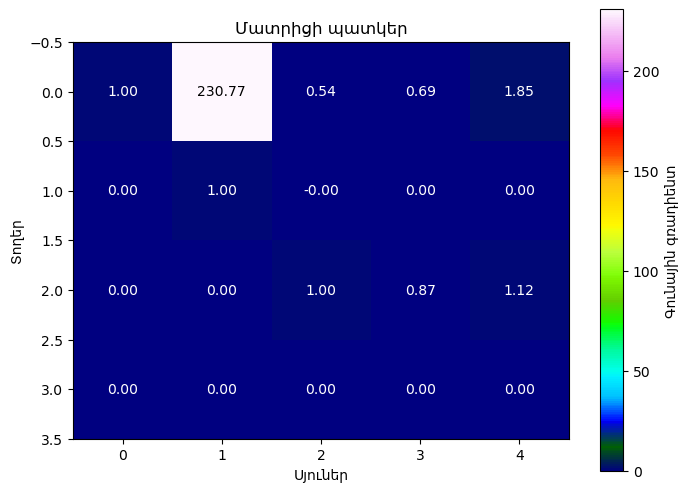

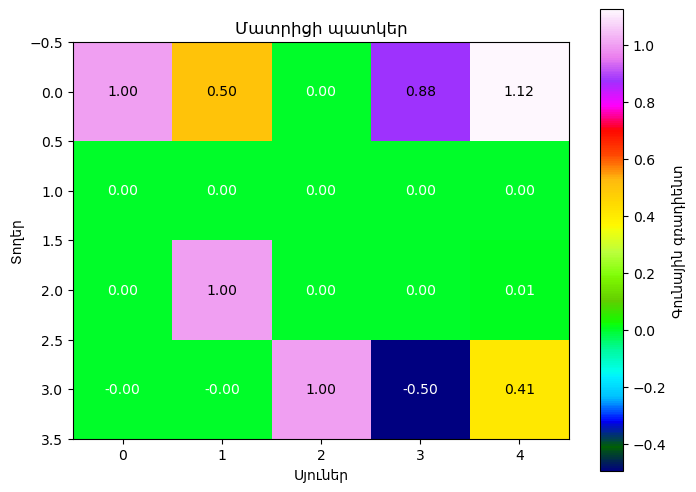

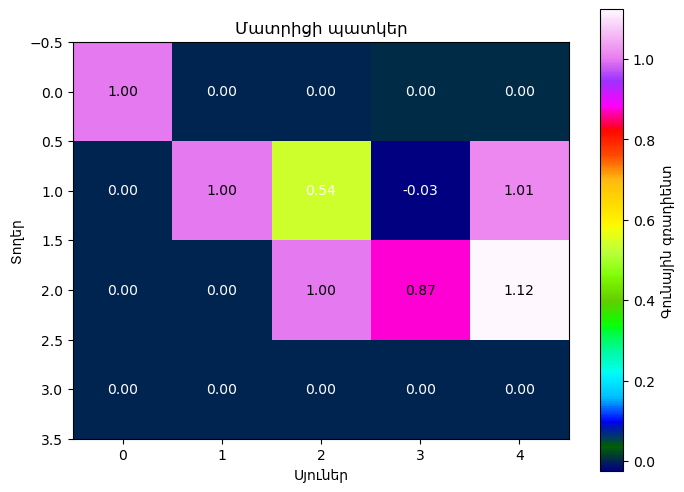

In [417]:
matrix1 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
print(matrix1)
matrix1.plot("example/first",True)
matrix1.complexity()
matrix1.gauss()
print(matrix1)
matrix1.complexity()
#matrix1.reverse()
print(matrix1)
matrix1.complexity()
print("------------------------------------")
matrix2 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
print(matrix2)
matrix2.complexity()
matrix2.PPgauss()
print(matrix2)
matrix2.complexity()
#matrix2.reverse()
print(matrix2)
matrix2.complexity()
print("------------------------------------")
matrix3 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
print(matrix3)
matrix3.complexity()
matrix3.ColPGauss()
print(matrix3)
matrix3.complexity()
#matrix3.reverse()
print(matrix3)
matrix3.complexity()

print("------------------------------------")
matrix4 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
print(matrix4)
matrix4.complexity()
matrix4.matPgauss()
print(matrix4)
matrix4.complexity()
#matrix4.reverse()
print(matrix4)
matrix4.complexity()


print(matrix1==matrix2)
print(matrix1.eqWithTol(matrix2,0.001))
matrix1.plot("example/1pre",True)
matrix2.plot("example/2pre",True)
matrix3.plot("example/3pre",True)
matrix4.plot("example/4pre",True)



C:\Users\user\AppData\Local\Temp\ipykernel_12912\67454745.py:215: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gist_ncar')


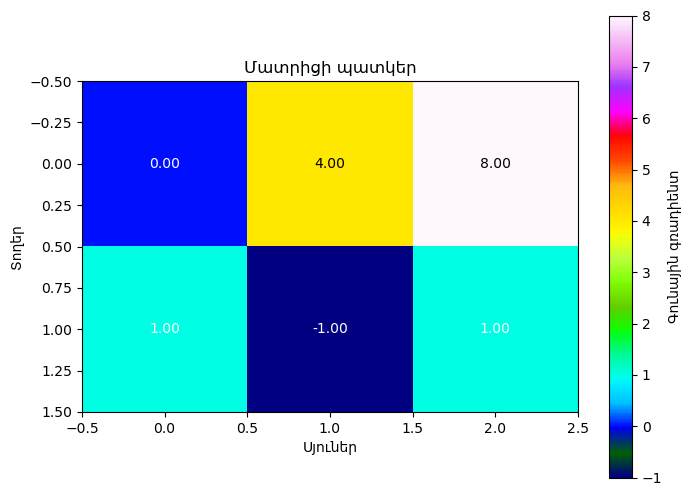

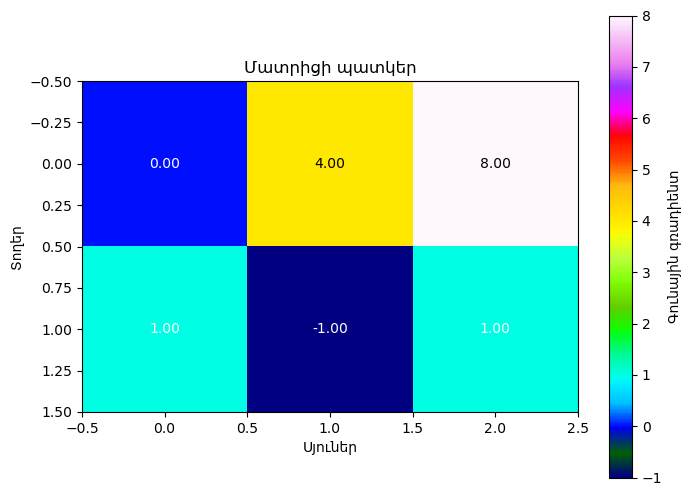

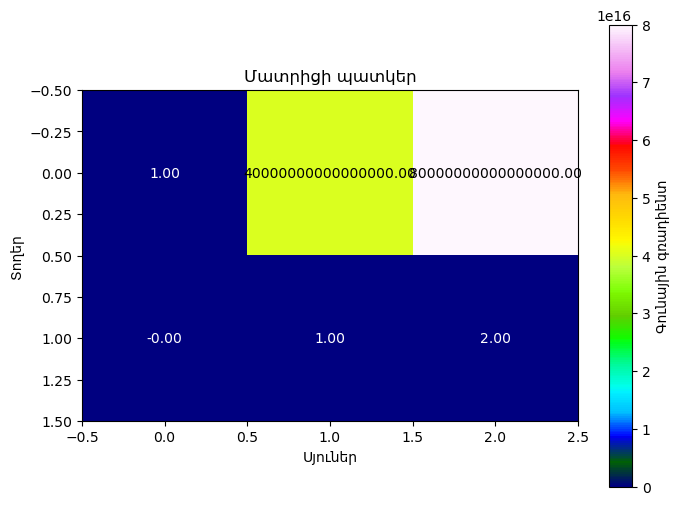

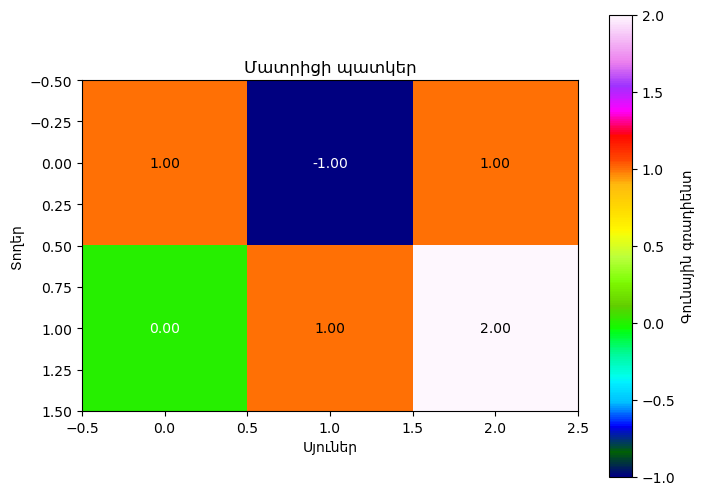

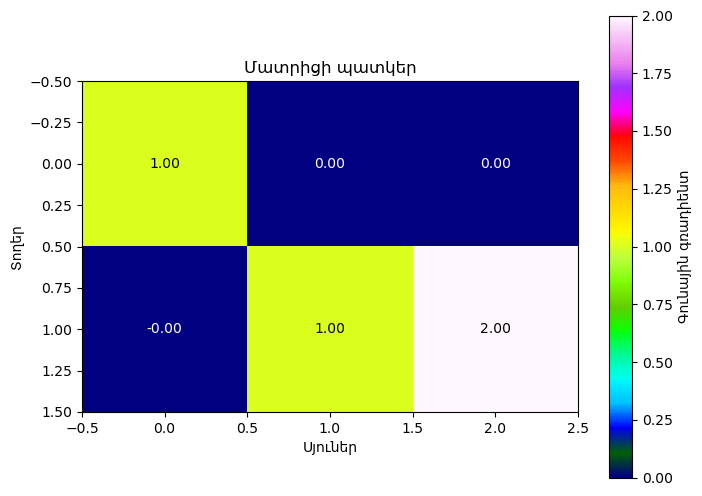

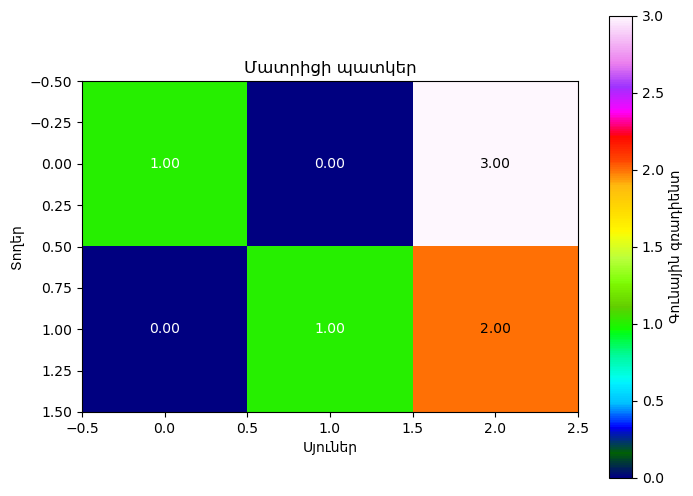

In [418]:
import copy
# errors = 0
# eq = 0
# for i in range(1):
#     try:
# a=Matrix.rand(10,11,(0,1))
# b = Matrix(copy.deepcopy(a.data))
a = Matrix(
    [
    [0.0000000000000001,4,8],
    [1, -1, 1],
])
b = Matrix(copy.deepcopy(a.data))
a.plot("eps/test",True)
b.plot(False,True)
a.gauss()
b.PPgauss()
a.plot("eps/testa",True)
b.plot("eps/testb",True)
#c.ColPGauss()
a.reverse()
b.reverse()
a.plot("eps/testar",True)
b.plot("eps/testbr",True)
#c.reverse()
#         if a.eqWithTol(b,0.001):
#             eq+=1
# #     except:
#         errors+=1
# print(f"errors:{errors} equalities:{eq}")

C:\Users\user\AppData\Local\Temp\ipykernel_12912\67454745.py:215: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gist_ncar')


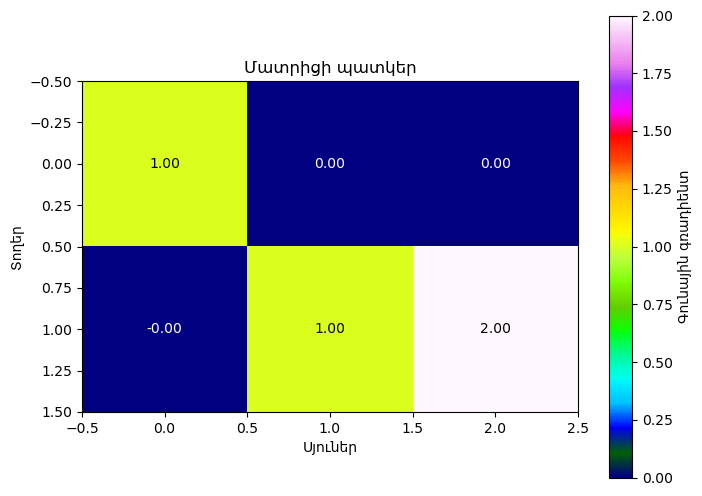

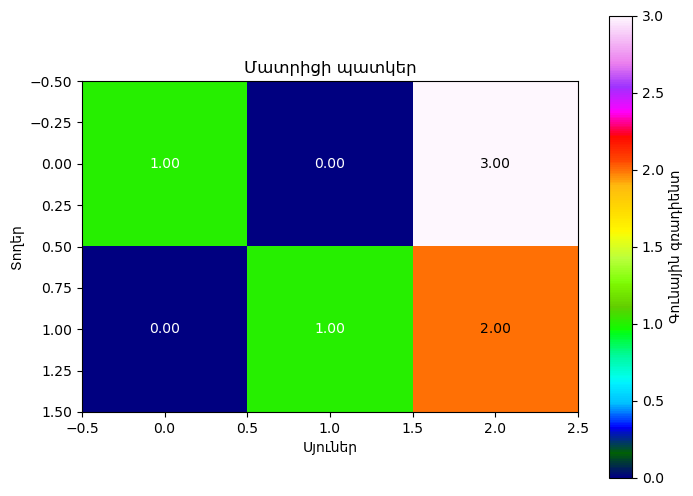

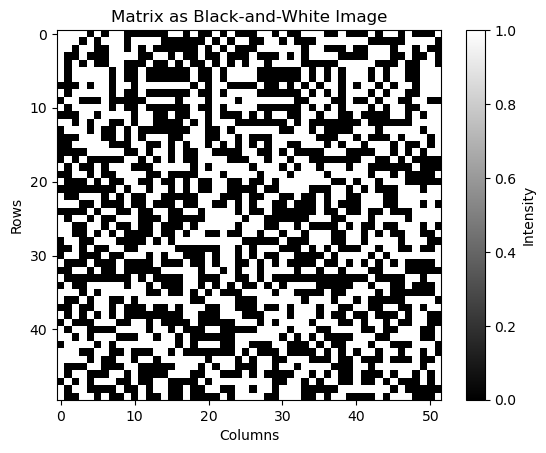

In [419]:
#անհայտների քանակ > հավասարումների քանակ
a.plot(False,True)

b.plot(False,True)

c.plot()

C:\Users\user\AppData\Local\Temp\ipykernel_12912\67454745.py:215: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gist_ncar')


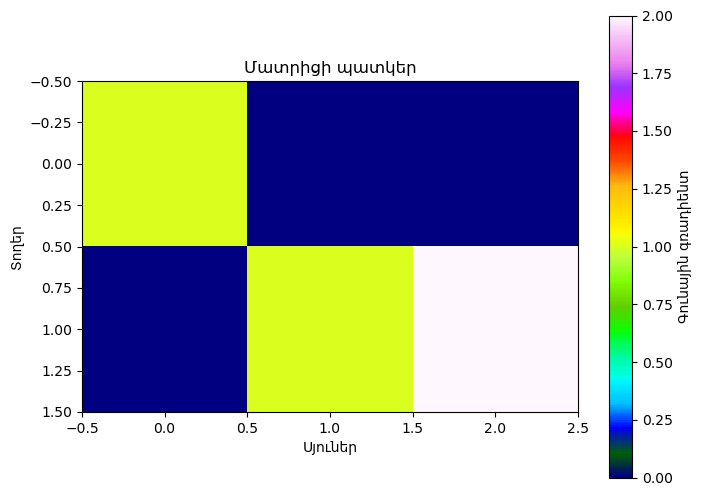

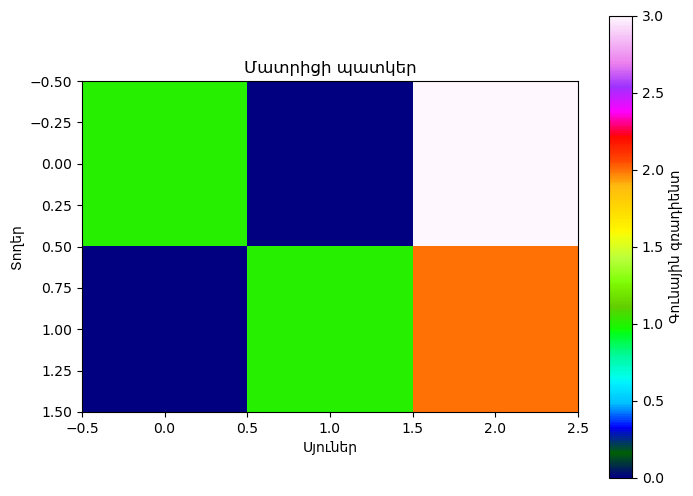

In [420]:
a.reverse()
b.reverse()
a.plot()
b.plot()

In [421]:
mat = Matrix.rand()
print(mat)

| 26.4618  59.5493  88.8600  16.7615 |
| 16.2476  69.3983  92.5291  45.7709 |
| 42.3607  3.3428  10.3063  8.9404 |

